In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

from sklearn import linear_model, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, f1_score, brier_score_loss
import scikitplot as skplt

pd.set_option('display.float_format', lambda x: '%3f' % x)

In [7]:
def gen_auc_viz(fpr, tpr, threshold):
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.title('Reorder (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show();

In [8]:
def plot_cm(y_true, y_pred):
    
    skplt.metrics.plot_confusion_matrix(
        y_true, 
        y_pred,
        figsize=(8,8))
    
#     tn = cm.iloc[0,0]
#     fn = cm.iloc[1,0]
#     fp = cm.iloc[0,1]
#     tp = cm.iloc[1,1]
    
#     acc = (tp+tn) / (tp+tn+fp+fn)
#     sen = (tp) / (tp+fn) #summarizes how well the positive class was predicted.
#     prec = tp / (tp+fp) #summarizes the fraction of examples assigned the positive class that belong to the positive class
#     rec = tp/(tp+fn) #same as sensitivity 
#     pp = tp / (tp+fp)
    
#     return acc, sen, prec, rec, pp

In [9]:
def scores_output(y_test, y_pred):

    plot_cm(y_test, y_pred)
    
    f1=f1_score(y_test,y_pred)
    brier=brier_score_loss(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    
    print(classification_report(y_test,y_pred))
    print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

In [10]:
full_df = pd.read_csv('../../data/full_df.csv')
# train_df = pd.read_csv('../../data/train_df.csv')
# prior_df = pd.read_csv('../../data/prior_df.csv')
# test_df = pd.read_csv('../../data/test_df.csv')

In [11]:
full_df.drop('Unnamed: 0',axis=1,inplace=True)
full_df.head()

,user_id,product_id,eval_set,target,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,...,user_reorder_ratio,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
0,112108,49302,train,1,1,3,1,4,2.000000,170,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
1,112108,11109,train,1,1,3,1,4,3.333333,4579,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
2,112108,43633,train,1,1,3,1,4,4.000000,663,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
3,112108,22035,train,1,1,3,1,4,6.000000,61241,...,0.764706,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
4,79431,19660,train,1,36,16,2,23,4.562500,57921,...,0.500000,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.695652,0.727273,0


In [12]:
#filling in null values - for previous calculations where user didn't do any reorders
full_df.product_ordered_twice_vol.fillna(0,inplace=True)
full_df.product_order_twice_ratio.fillna(0,inplace=True)
full_df.user_unique_reorder_count.fillna(0,inplace=True)
full_df.user_unique_reorder_perc.fillna(0,inplace=True)
full_df.user_total_items_after_first_order.fillna(0,inplace=True)
full_df.user_reorder_ratio.fillna(0,inplace=True)
full_df.isnull().sum()

user_id                                   0
product_id                                0
eval_set                                  0
target                                    0
order_id                                  0
user_product_count                        0
user_product_first_order                  0
user_product_last_order                   0
user_product_avg_basket_placement         0
product_ordered_vol                       0
product_reordered_vol                     0
product_ordered_once_vol                  0
product_ordered_twice_vol                 0
product_order_twice_ratio                 0
product_avg_reorders                      0
product_overall_reorder_prob              0
user_total_products                       0
user_total_products_reordered             0
user_unique_product_count                 0
user_unique_reorder_count                 0
user_unique_product_perc                  0
user_unique_reorder_perc                  0
user_total_items_after_first_ord

In [13]:
print(full_df.target.value_counts())
print(full_df.target.value_counts(normalize=True))


0    7645837
1     828824
Name: target, dtype: int64
0   0.902200
1   0.097800
Name: target, dtype: float64


<AxesSubplot:>

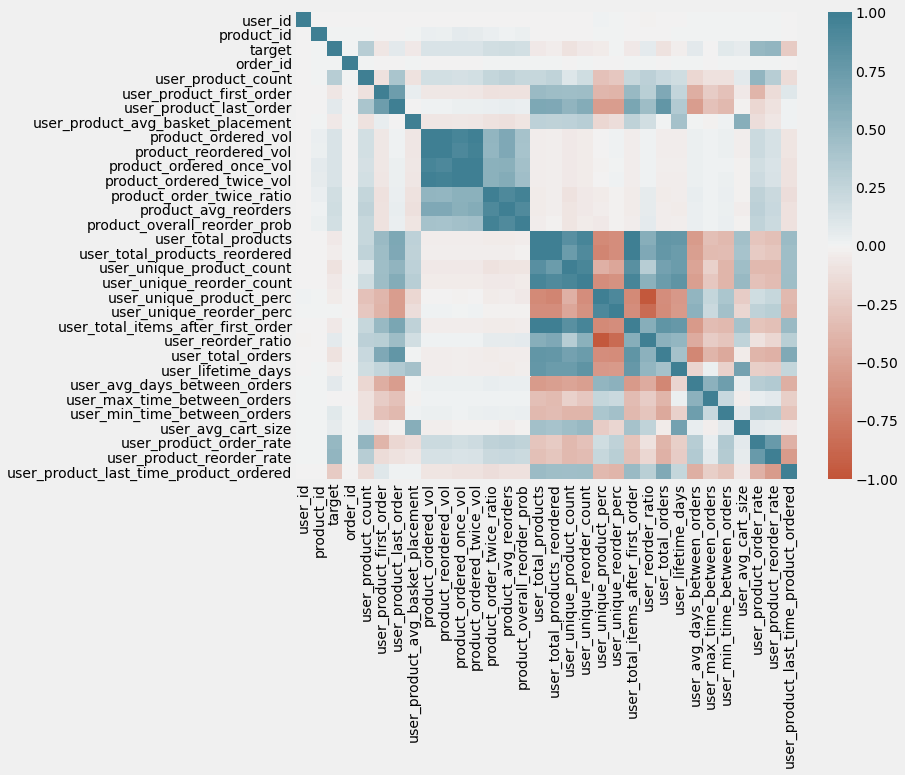

In [14]:
sns.heatmap(full_df.corr(),vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200))

In [15]:
full_df.drop(['product_ordered_once_vol','product_reordered_vol',
             'user_unique_product_count','user_unique_reorder_count',
             'user_total_items_after_first_order'],axis=1, inplace=True)

<AxesSubplot:>

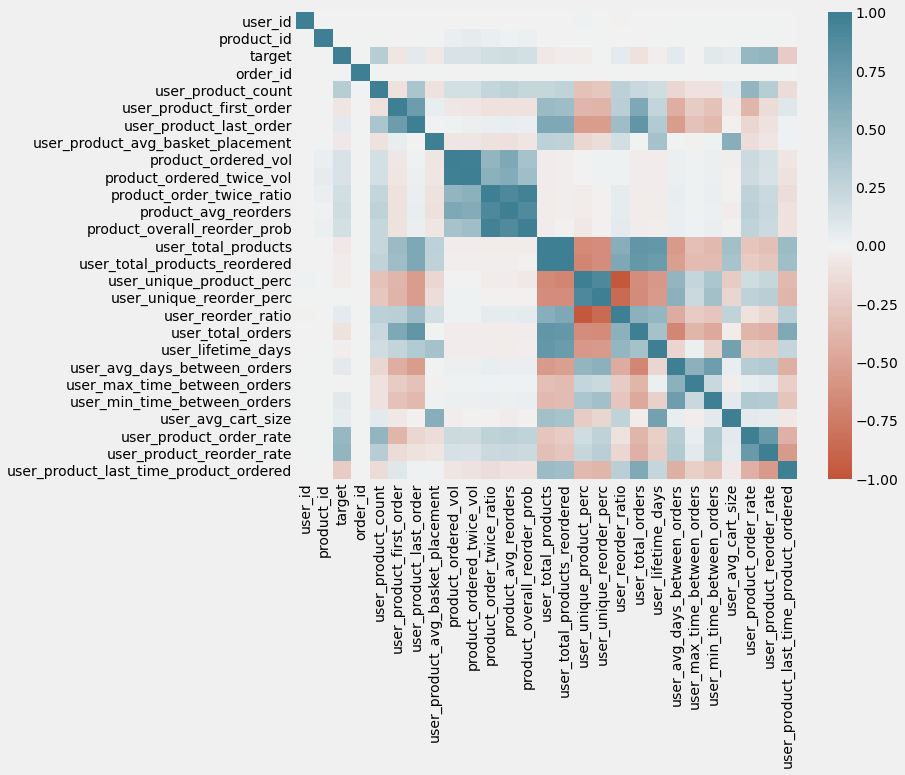

In [16]:
sns.heatmap(full_df.corr(),vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200))

### Multicolinearity Check 
columns that have high correlation with other features

In [17]:
cor_matrix = full_df.corr().abs()
upper = cor_matrix.where(
    np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# print(upper)

drop_these = [column for column in upper.columns if any(upper[column] > 0.80)]

In [18]:
drop_these

['product_ordered_twice_vol',
 'product_avg_reorders',
 'product_overall_reorder_prob',
 'user_total_products_reordered',
 'user_unique_reorder_perc',
 'user_reorder_ratio']

In [19]:
full_new = full_df.drop(full_df[drop_these], axis=1)
full_new.head()

,user_id,product_id,eval_set,target,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,...,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
0,112108,49302,train,1,1,3,1,4,2.000000,170,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
1,112108,11109,train,1,1,3,1,4,3.333333,4579,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
2,112108,43633,train,1,1,3,1,4,4.000000,663,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
3,112108,22035,train,1,1,3,1,4,6.000000,61241,...,0.480000,4,167.000000,9.823529,15.000000,7.000000,6.250000,0.750000,0.750000,0
4,79431,19660,train,1,36,16,2,23,4.562500,57921,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.695652,0.727273,0


Only doing analysis on users whose # of total orders are greater than the mean, or 16+. This is done so we can cater reordering predictions to those users who use Instacart the most

In [20]:
gr_mean= full_new[full_new.user_total_orders > 16]

In [21]:
gr_mean

,user_id,product_id,eval_set,target,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,...,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
4,79431,19660,train,1,36,16,2,23,4.562500,57921,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.695652,0.727273,0
5,79431,43086,train,1,36,4,5,23,6.250000,15699,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.173913,0.210526,0
6,79431,46620,train,1,36,2,15,23,5.000000,1101,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.086957,0.222222,0
7,79431,34497,train,1,36,2,8,23,6.500000,4411,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.086957,0.125000,0
8,79431,48679,train,1,36,3,17,23,4.666667,53618,...,0.523316,23,3238.000000,17.597826,30.000000,2.000000,8.391304,0.130435,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474650,103510,49187,prior,0,1597750,1,30,30,1.000000,149,...,0.542125,31,3236.000000,12.211321,28.000000,0.000000,8.806452,0.032258,0.500000,1
8474651,103510,20126,prior,0,1597750,1,30,30,2.000000,1030,...,0.542125,31,3236.000000,12.211321,28.000000,0.000000,8.806452,0.032258,0.500000,1
8474652,52726,38061,prior,0,3161449,1,2,2,9.000000,546,...,0.098131,43,1526.000000,7.554455,28.000000,1.000000,4.976744,0.023256,0.023810,41
8474659,175185,12023,prior,0,651501,1,23,23,6.000000,3554,...,0.473684,32,2242.000000,9.876652,30.000000,1.000000,7.718750,0.031250,0.100000,9


## Splitting Data
Will first split dataset into train, test, validation sets and then do a T/T/S on training set for model tuning

In [22]:
full_df.shape

(8474661, 28)

In [23]:
gr_mean.shape

(4696252, 22)

In [24]:
gr_mean.user_id.nunique()

41532

Used before- split train/test/validate randomly by row

In [25]:
np.random.seed(42)
train, validate, test = \
        np.split(gr_mean.sample(frac=1, random_state=42), 
                 [int(.6*len(gr_mean)), int(.8*len(gr_mean))])
#                  [int(.8*len(gr_mean))])                 

splitting train/test/validation by group (user_id) instead of by row

In [26]:
# temp = gr_mean.user_id.rank(method='dense').astype(int)
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.40, n_splits=2, random_state = 42).split(gr_mean, groups=gr_mean['user_id']))
t1 = gr_mean.iloc[train_inds]
t2 = gr_mean.iloc[test_inds]

test_inds, val_inds = next(GroupShuffleSplit(test_size=.50, n_splits=2, random_state = 42).split(t2, groups=t2['user_id']))

t3= t2.iloc[test_inds]
t4= t2.iloc[val_inds]



In [27]:
print(t1.shape)
print(t2.shape)
print(t3.shape)
print(t4.shape)

train = t1
test = t3
validate = t4

(2822671, 22)
(1873581, 22)
(929736, 22)
(943845, 22)


In [28]:
print(train.shape) #60%
print(test.shape) #20%
print(validate.shape) #20

(2822671, 22)
(929736, 22)
(943845, 22)


In [29]:
print(train.target.mean())
print(test.target.mean())
print(validate.target.mean())
print(test.target.mean())

0.07355161122213677
0.07511272017002676
0.07381084817952101
0.07511272017002676


In [30]:
X= train.drop(["target",'eval_set'],axis=1)
y= train['target']

In [31]:
print(X.mean())
print(X.std())

train_mean = X.mean()
train_std = X.std()

user_id                                   102816.339824
product_id                                 25467.839900
order_id                                 1709962.809475
user_product_count                             3.126320
user_product_first_order                      16.043546
user_product_last_order                       24.715575
user_product_avg_basket_placement              9.412784
product_ordered_vol                        21448.295344
product_order_twice_ratio                      0.825736
user_total_products                          483.740629
user_unique_product_perc                       0.371715
user_total_orders                             40.104406
user_lifetime_days                          3868.632211
user_avg_days_between_orders                   9.534849
user_max_time_between_orders                  25.819801
user_min_time_between_orders                   1.503754
user_avg_cart_size                            12.363418
user_product_order_rate                        0

In [32]:
X_val = validate.drop(["target",'eval_set'],axis=1)

In [33]:
X_fin = test.drop(["target",'eval_set'],axis=1)

In [34]:
print(X.shape)
print(y.shape)

(2822671, 20)
(2822671,)


In [35]:
#comparing feature means for train test validation data 
pd.concat([X.mean(),X_val.mean(),X_fin.mean()], axis=1)

,0,1,2
user_id,102816.339824,102233.516697,102636.597919
product_id,25467.839900,25501.060957,25493.232612
order_id,1709962.809475,1669062.821170,1701792.398724
user_product_count,3.126320,3.120964,3.120592
user_product_first_order,16.043546,16.146483,15.795944
user_product_last_order,24.715575,24.868437,24.320039
user_product_avg_basket_placement,9.412784,9.394489,9.314868
product_ordered_vol,21448.295344,21625.715450,21526.023336
product_order_twice_ratio,0.825736,0.826259,0.826453
user_total_products,483.740629,487.994093,470.038137


In [36]:
X_train, X_test, y_train, y_test = (
    train_test_split(X,y, test_size=0.2, random_state=42))

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
type(X_train)

(2258136, 20)
(564535, 20)
(2258136,)
(564535,)


pandas.core.frame.DataFrame

In [38]:
train.to_csv('../../data/train.csv')
test.to_csv('../../data/test.csv')
validate.to_csv('../../data/validate.csv')

In [39]:
# X_train = X_train.sort_index(axis=1)
# X_test = X_test.sort_index(axis=1)
X_test[(X_test.user_id == 148742) &(X_test.product_id == 13997)]

,user_id,product_id,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,product_order_twice_ratio,user_total_products,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered


### Scaling all features minus ID features using ColumnTransformer

In [40]:
col_names = X_train.drop(['user_id','product_id','order_id'],axis=1)
col_names = col_names.columns
all_cols = X_train.columns
features = X_train[all_cols]
# features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([('train_scaler', StandardScaler(), col_names)], remainder='passthrough')

X_train_scaled = ct.fit_transform(features)
X_test_scaled = ct.transform(X_test)


In [41]:
cols_reordered = ['user_product_count', 'user_product_first_order',
         'user_product_last_order', 'user_product_avg_basket_placement',
         'product_ordered_vol', 'product_order_twice_ratio',
         'user_total_products', 'user_unique_product_perc', 'user_total_orders',
         'user_lifetime_days', 'user_avg_days_between_orders',
         'user_max_time_between_orders', 'user_min_time_between_orders',
         'user_avg_cart_size', 'user_product_order_rate',
         'user_product_reorder_rate', 'user_product_last_time_product_ordered',
         'user_id','product_id','order_id']
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns = cols_reordered) 
X_train_scaled_df
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns = cols_reordered)
X_test_scaled_df

X_train_scaled_df['user_id'] = X_train_scaled_df.user_id.astype('str')
X_train_scaled_df['order_id'] = X_train_scaled_df.order_id.astype('str')
X_train_scaled_df['product_id'] = X_train_scaled_df.product_id.astype('str')

X_test_scaled_df['user_id'] = X_test_scaled_df.user_id.astype('str')
X_test_scaled_df['order_id'] = X_test_scaled_df.order_id.astype('str')
X_test_scaled_df['product_id'] = X_test_scaled_df.product_id.astype('str')

X_train_scaled_df.dtypes
# X_test_scaled_df

user_product_count                        float64
user_product_first_order                  float64
user_product_last_order                   float64
user_product_avg_basket_placement         float64
product_ordered_vol                       float64
product_order_twice_ratio                 float64
user_total_products                       float64
user_unique_product_perc                  float64
user_total_orders                         float64
user_lifetime_days                        float64
user_avg_days_between_orders              float64
user_max_time_between_orders              float64
user_min_time_between_orders              float64
user_avg_cart_size                        float64
user_product_order_rate                   float64
user_product_reorder_rate                 float64
user_product_last_time_product_ordered    float64
user_id                                    object
product_id                                 object
order_id                                   object


In [42]:
# print(y_test.shape)
# print(X_test.shape)
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train.shape)

(2258136, 20)
(564535, 20)
(2258136,)


In [43]:
zip(set(y_train), ('orange', 'blue'))

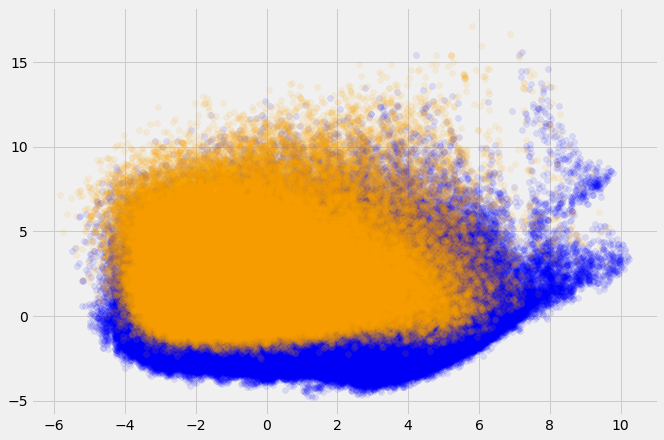

In [44]:
from sklearn.decomposition import PCA

X_train_scaled = X_train_scaled_df.iloc[:,:17]
X_test_scaled = X_test_scaled_df.iloc[:,:17]

pca = PCA(n_components=0.95) #get 95% of variance explained
X_train_dim_red = pca.fit_transform(X_train_scaled)
X_test_dim_red = pca.transform(X_test_scaled)

fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(y_train), ('blue', 'orange')):
    ax.scatter(
        X_train_dim_red[y_train == label, 0],
        X_train_dim_red[y_train == label, 1],
        color=color, label=f'Class {label}',
        alpha=0.1)

### Ended up not using standardized features 

In [45]:
# X_train = X_train_scaled_df
# X_test = X_test_scaled_df 

In [46]:
X_train

,user_id,product_id,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,product_order_twice_ratio,user_total_products,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
4509877,50458,11782,2461845,1,9,9,9.000000,14720,0.902871,679,0.334315,47,5997.000000,9.355694,30.000000,0.000000,14.446809,0.021277,0.025641,38
6050667,164494,21463,1673705,1,20,20,6.000000,4958,0.800371,213,0.300469,23,2407.000000,11.461905,30.000000,2.000000,9.260870,0.043478,0.250000,3
769183,152208,23854,3175365,4,4,24,7.250000,2323,0.764553,454,0.403084,24,6881.000000,15.567873,29.000000,6.000000,18.916667,0.166667,0.190476,0
4194537,157307,14627,1896081,5,40,48,11.800000,862,0.703057,520,0.311538,49,3597.000000,7.310976,19.000000,2.000000,10.612245,0.102041,0.500000,1
3948526,52605,18087,2577294,1,15,15,12.000000,41,0.411765,256,0.394531,32,1622.000000,6.385827,24.000000,0.000000,8.000000,0.031250,0.055556,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893099,52124,19125,529461,5,2,8,7.000000,5538,0.790460,395,0.379747,24,6148.000000,16.052219,30.000000,1.000000,16.458333,0.208333,0.217391,16
6953117,177611,5006,2266101,1,8,8,3.000000,738,0.151111,204,0.676471,17,2655.000000,13.275000,30.000000,1.000000,12.000000,0.058824,0.100000,9
6552017,14699,42701,1681768,3,15,22,10.000000,27317,0.902534,369,0.482385,26,3948.000000,11.184136,28.000000,0.000000,14.192308,0.115385,0.250000,4
8294705,69052,27344,2613230,1,2,2,23.000000,42652,1.043898,467,0.601713,69,2455.000000,5.302376,30.000000,0.000000,6.768116,0.014493,0.014706,67


## Logistic Regression 

In [47]:
X_train

,user_id,product_id,order_id,user_product_count,user_product_first_order,user_product_last_order,user_product_avg_basket_placement,product_ordered_vol,product_order_twice_ratio,user_total_products,user_unique_product_perc,user_total_orders,user_lifetime_days,user_avg_days_between_orders,user_max_time_between_orders,user_min_time_between_orders,user_avg_cart_size,user_product_order_rate,user_product_reorder_rate,user_product_last_time_product_ordered
4509877,50458,11782,2461845,1,9,9,9.000000,14720,0.902871,679,0.334315,47,5997.000000,9.355694,30.000000,0.000000,14.446809,0.021277,0.025641,38
6050667,164494,21463,1673705,1,20,20,6.000000,4958,0.800371,213,0.300469,23,2407.000000,11.461905,30.000000,2.000000,9.260870,0.043478,0.250000,3
769183,152208,23854,3175365,4,4,24,7.250000,2323,0.764553,454,0.403084,24,6881.000000,15.567873,29.000000,6.000000,18.916667,0.166667,0.190476,0
4194537,157307,14627,1896081,5,40,48,11.800000,862,0.703057,520,0.311538,49,3597.000000,7.310976,19.000000,2.000000,10.612245,0.102041,0.500000,1
3948526,52605,18087,2577294,1,15,15,12.000000,41,0.411765,256,0.394531,32,1622.000000,6.385827,24.000000,0.000000,8.000000,0.031250,0.055556,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893099,52124,19125,529461,5,2,8,7.000000,5538,0.790460,395,0.379747,24,6148.000000,16.052219,30.000000,1.000000,16.458333,0.208333,0.217391,16
6953117,177611,5006,2266101,1,8,8,3.000000,738,0.151111,204,0.676471,17,2655.000000,13.275000,30.000000,1.000000,12.000000,0.058824,0.100000,9
6552017,14699,42701,1681768,3,15,22,10.000000,27317,0.902534,369,0.482385,26,3948.000000,11.184136,28.000000,0.000000,14.192308,0.115385,0.250000,4
8294705,69052,27344,2613230,1,2,2,23.000000,42652,1.043898,467,0.601713,69,2455.000000,5.302376,30.000000,0.000000,6.768116,0.014493,0.014706,67


In [48]:
1-y_train.mean()

0.9263405747040923

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))


0.9261870388904142


In [50]:
reorder_logit_prob = logreg.predict_proba(X_test)[:,1]

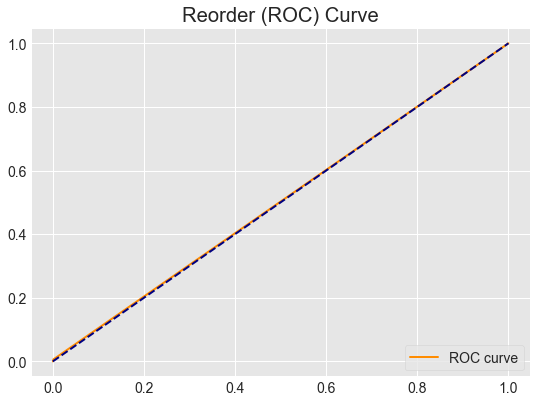

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gen_auc_viz(fpr, tpr, thresholds)

# roc_curve(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    523256
           1       0.29      0.01      0.01     41279

    accuracy                           0.93    564535
   macro avg       0.61      0.50      0.49    564535
weighted avg       0.88      0.93      0.89    564535

f1:0.01247,auc:0.50256,loss_score:0.07381


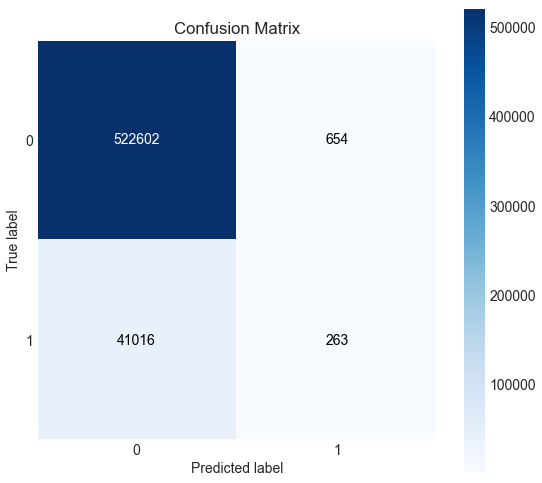

In [52]:
plot_cm(y_test, y_pred)

f1=f1_score(y_test,y_pred)
brier=brier_score_loss(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

The model is not great at predicting true positives

### Tuning Parameters
C regularization + class weights

In [53]:
# C_param_range = [0.001,0.01,0.1,1,10,100,1000]

# stored_score_vals = pd.DataFrame(columns = ['C_parameter','F1','AUC','Accuracy'])
# stored_score_vals['C_parameter'] = C_param_range

# j = 0
# for i in C_param_range:
#     logreg = LogisticRegression(penalty = 'l2', C= i, random_state = 0)
#     logreg.fit(X_train, y_train)
    
#     y_pred = logreg.predict(X_test)
#     print(logreg.score(X_test, y_test))
    
#     reorder_logit_prob = logreg.predict_proba(X_test)[:,1]
    
#     stored_score_vals.iloc[j,1] = f1_score(y_test,y_pred)
#     stored_score_vals.iloc[j,2] = roc_auc_score(y_test,y_pred)
#     stored_score_vals.iloc[j,3] = accuracy_score(y_test,y_pred)
#     j += 1



{'class_weight': {0: 0.17857142857142855, 1: 0.8214285714285714}}


<AxesSubplot:xlabel='weight'>

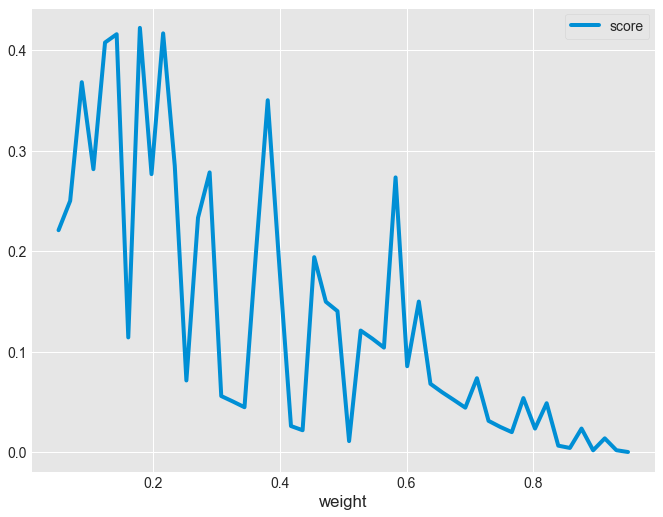

In [55]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 50)

clf = LogisticRegression(max_iter=500)
grid_values = {'class_weight':[{0:x, 1:1.0-x} for x in weights]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1',cv=3)

grid_result = grid_clf_acc.fit(X_train, y_train)
y_pred = grid_clf_acc.predict(X_test)

print(grid_result.best_params_)

weight_plts = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],'weight': weights })
weight_plts.plot(x='weight')

best param = {'class_weight': {0: 0.17857142857142855, 1: 0.8214285714285714}}

In [57]:
clf = LogisticRegression(class_weight={0: 0.17857142857142855, 1: 0.8214285714285714}, max_iter=500)
grid_values = {'penalty': ['none','l2'],'C':[0.001,.009,0.01,.1,1,10,100,1000]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'f1')

grid_clf_acc.fit(X_train, y_train)

y_pred = grid_clf_acc.predict(X_test)

f1=f1_score(y_test,y_pred)
brier=brier_score_loss(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

confusion_matrix(y_test,y_pred)

/Users/tiffany.chen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tiffany.chen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tiffany.chen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tiffany.chen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tiffany.chen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/tiffany.

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    523256
           1       0.23      0.06      0.10     41279

    accuracy                           0.92    564535
   macro avg       0.58      0.52      0.53    564535
weighted avg       0.88      0.92      0.89    564535

f1:0.10111,auc:0.52393,loss_score:0.08375


array([[514596,   8660],
       [ 38620,   2659]])

In [58]:
grid_clf_acc.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
# stored_score_vals

In [59]:
# logreg = LogisticRegression(penalty = 'l2', C= 0.1, random_state = 0, max_iter=500)
logreg = LogisticRegression(C=0.1, penalty= 'l2',class_weight={0: 0.17857142857142855, 1: 0.8214285714285714}, max_iter=500)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
reorder_logit_prob = logreg.predict_proba(X_test)[:,1]

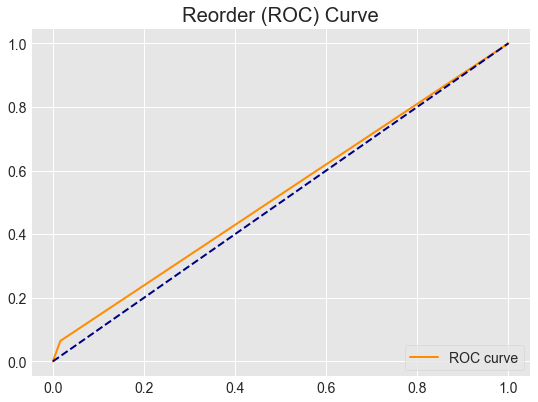

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gen_auc_viz(fpr, tpr, thresholds)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    523256
           1       0.23      0.06      0.10     41279

    accuracy                           0.92    564535
   macro avg       0.58      0.52      0.53    564535
weighted avg       0.88      0.92      0.89    564535

f1:0.10111,auc:0.52393,loss_score:0.08375


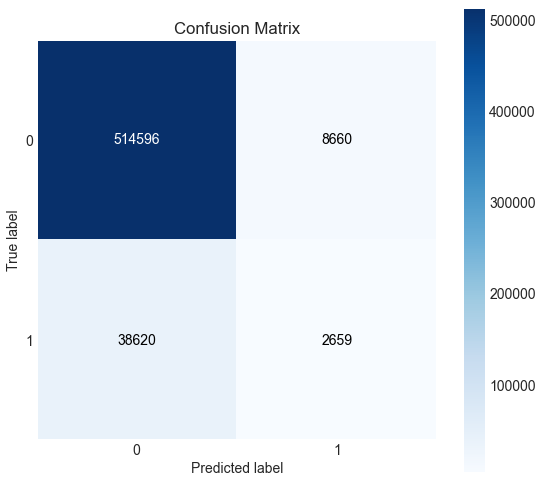

In [61]:
plot_cm(y_test, y_pred)
f1=f1_score(y_test,y_pred)
brier=brier_score_loss(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)

print(classification_report(y_test,y_pred))
print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")

### Tuning right probability threshold 
Goal is to set probability threshold to different intervals, and see which threshold produces the 'best' success metric.

In [79]:

for i in np.arange(0.0,1.0,0.05):
    prob_thresh = i
    cm = pd.DataFrame(metrics.confusion_matrix
                      (y_true=y_test, y_pred=reorder_logit_prob > i), 
                      columns=['Negative Pred', 'Positive Pred'])
    tn = cm.iloc[0,0]
    fn = cm.iloc[1,0]
    fp = cm.iloc[0,1]
    tp = cm.iloc[1,1]
    
    acc = (tp+tn) / (tp+tn+fp+fn)
    sen = (tp) / (tp+fn) #summarizes how well the positive class was predicted.
    prec = tp / (tp+fp) #summarizes the fraction of examples assigned the positive class that belong to the positive class
    rec = tp/(tp+fn) #same as sensitivity 
    pp = tp / (tp+fp)

    f1=f1_score(y_test,reorder_logit_prob > i)
    brier=brier_score_loss(y_test, reorder_logit_prob > i)
    auc=roc_auc_score(y_test, reorder_logit_prob > i)

    print(round(i,2),f"accuracy:{acc:.5f},sensitivity:{sen:.5f},precision:{prec:.5f},recall:{rec:.5f}, ppv:{pp:5f}")
    print(f"f1:{f1:.5f},auc:{auc:.5f},loss_score:{brier:.5f}")
    print(" ")

0.0 accuracy:0.07312,sensitivity:1.00000,precision:0.07312,recall:1.00000, ppv:0.073120
f1:0.13628,auc:0.50000,loss_score:0.92688
 
0.05 accuracy:0.07414,sensitivity:0.99918,precision:0.07314,recall:0.99918, ppv:0.073143
f1:0.13631,auc:0.50017,loss_score:0.92586
 
0.1 accuracy:0.08222,sensitivity:0.99421,precision:0.07343,recall:0.99421, ppv:0.073428
f1:0.13676,auc:0.50224,loss_score:0.91778
 
0.15 accuracy:0.12068,sensitivity:0.96778,precision:0.07467,recall:0.96778, ppv:0.074668
f1:0.13864,auc:0.51082,loss_score:0.87932
 
0.2 accuracy:0.23458,sensitivity:0.87568,precision:0.07805,recall:0.87568, ppv:0.078051
f1:0.14333,auc:0.52984,loss_score:0.76542
 
0.25 accuracy:0.42655,sensitivity:0.69033,precision:0.08395,recall:0.69033, ppv:0.083949
f1:0.14969,auc:0.54803,loss_score:0.57345
 
0.3 accuracy:0.63120,sensitivity:0.47055,precision:0.09440,recall:0.47055, ppv:0.094396
f1:0.15725,auc:0.55721,loss_score:0.36880
 
0.35 accuracy:0.78364,sensitivity:0.28230,precision:0.11187,recall:0.2823

<ipython-input-79-7a60d578acd0>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp+fp) #summarizes the fraction of examples assigned the positive class that belong to the positive class
<ipython-input-79-7a60d578acd0>:15: RuntimeWarning: invalid value encountered in long_scalars
  pp = tp / (tp+fp)


0.95 accuracy:0.92688,sensitivity:0.00000,precision:nan,recall:0.00000, ppv:  nan
f1:0.00000,auc:0.50000,loss_score:0.07312
 


A good threshold that optimizes on f1 + auc as well as loss. is .35

              precision    recall  f1-score   support

           0       0.94      0.82      0.88    523256
           1       0.11      0.28      0.16     41279

    accuracy                           0.78    564535
   macro avg       0.52      0.55      0.52    564535
weighted avg       0.88      0.78      0.82    564535

f1:0.16024,auc:0.55275,loss_score:0.21636


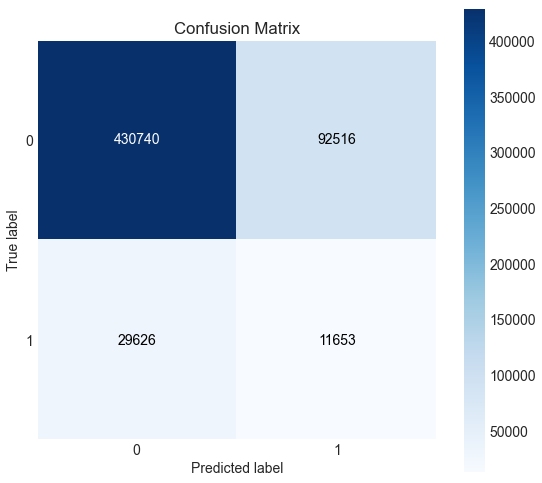

In [63]:
cm = pd.DataFrame(metrics.confusion_matrix
                  (y_true=y_test, y_pred=reorder_logit_prob > 0.35), 
                  columns=['Negative Pred', 'Positive Pred'])

scores_output(y_test, reorder_logit_prob > 0.35)


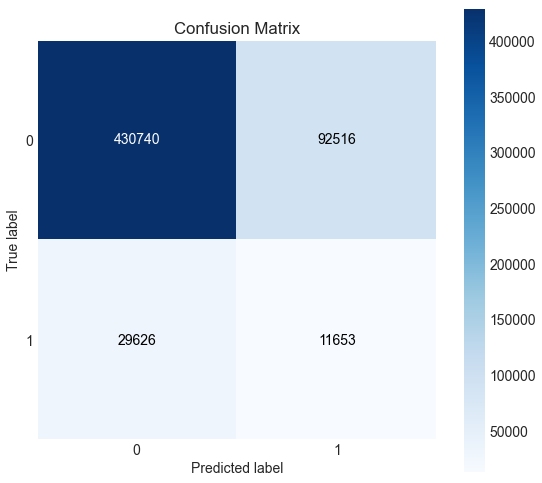

In [64]:
plot_cm(y_test, reorder_logit_prob > 0.35)

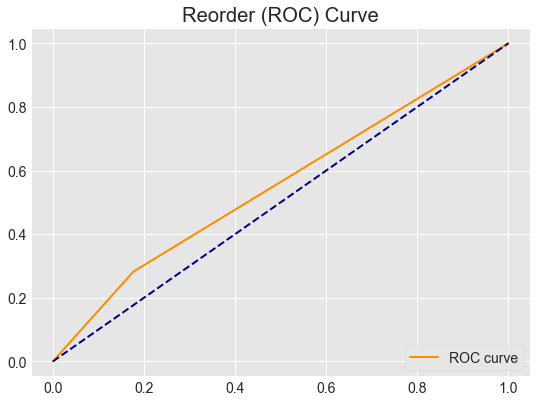

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, reorder_logit_prob > 0.35)
#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

## Feature Selection 

### Select K Best 

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_model_new = SelectKBest(score_func=chi2,k=20)
fit= X_model_new.fit(X_train,y_train)
X_model_new
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  

In [67]:
feature_ranks = feature_scores.sort_values('Score', ascending=False).reset_index(drop=True)
feature_ranks.rename(columns={"Feature_Name":"Select_K_rank","Score":"Select_K_score"},inplace=True)
feature_ranks

,Select_K_rank,Select_K_score
0,product_ordered_vol,4763431372.779738
1,user_lifetime_days,3783752.885913
2,user_product_last_time_product_ordered,2761501.305233
3,user_product_count,2217946.879303
4,user_product_last_order,926514.806452
5,order_id,176982.472036
6,user_product_first_order,101644.556865
7,user_product_reorder_rate,92089.523241
8,product_id,84511.817489
9,user_total_orders,74744.621554


<AxesSubplot:xlabel='Select_K_rank'>

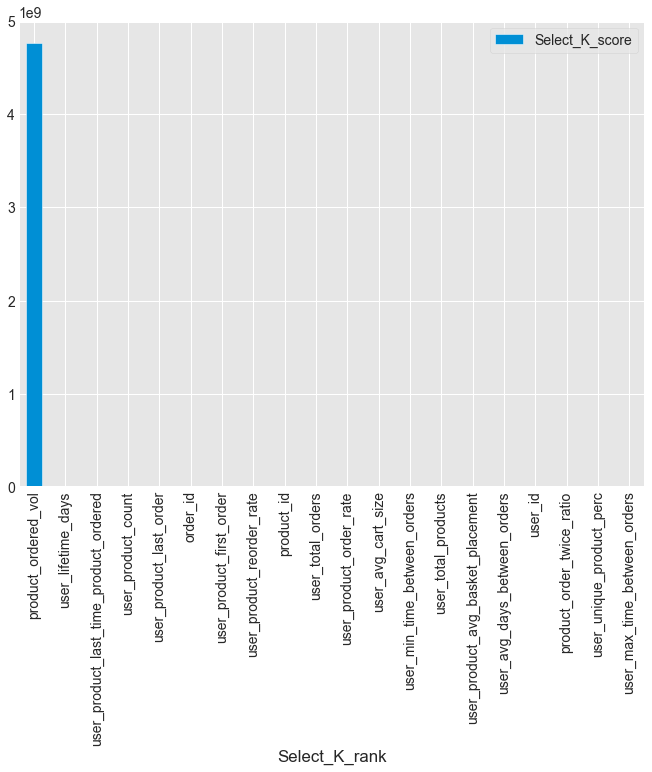

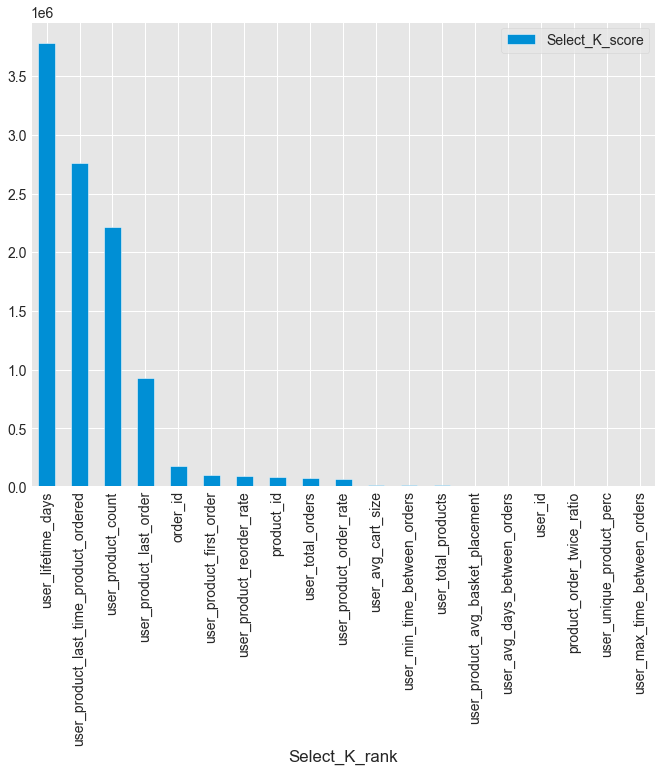

In [68]:
feature_ranks.plot(kind='bar',x='Select_K_rank',y='Select_K_score')
feature_ranks.iloc[1:].plot(kind='bar',x='Select_K_rank',y='Select_K_score')

In [69]:
# best_features = feature_ranks['Select_K_rank'][:11]
# best_features
best_features = pd.concat([feature_ranks.iloc[:11,:],feature_ranks.iloc[-1:,:]])
best_features = best_features.Select_K_rank
# best_features = best_features.tolist()

<AxesSubplot:>

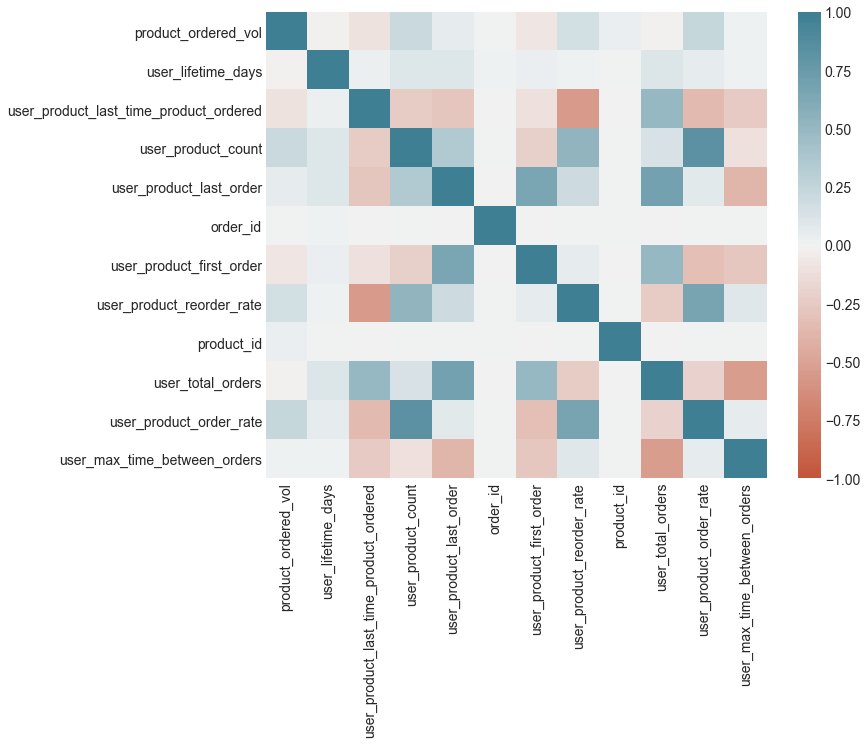

In [70]:
sns.heatmap(gr_mean[best_features].corr(),vmin=-1, vmax=1, center=0,
           cmap=sns.diverging_palette(20, 220, n=200))

### RFE

In [ ]:
# from sklearn.feature_selection import RFE

# logreg=LogisticRegression(penalty = 'l2', C= .1, max_iter=500)
# selector = RFE(logreg, n_features_to_select = 1)
# selector = selector.fit(X_train, y_train);

# order = selector.ranking_
# order

# feature_ranks=[]
# for i in order:
#     feature_ranks.append(f"{i}).{X_train.columns[i]}") 
# feature_ranks

### Select from model

In [71]:
from sklearn.feature_selection import SelectFromModel

# sfm1= SelectFromModel(logreg, threshold='mean')
# sfm2= SelectFromModel(logreg, threshold='median')
sfm3= SelectFromModel(logreg, threshold= -np.inf)
# sfm1.fit(X_train, y_train)
# sfm2.fit(X_train, y_train)
sfm3.fit(X_train, y_train)

feature_idx = sfm3.get_support()
feature_name = X_train.columns[feature_idx]
feature_name

Index(['user_id', 'product_id', 'order_id', 'user_product_count',
       'user_product_first_order', 'user_product_last_order',
       'user_product_avg_basket_placement', 'product_ordered_vol',
       'product_order_twice_ratio', 'user_total_products',
       'user_unique_product_perc', 'user_total_orders', 'user_lifetime_days',
       'user_avg_days_between_orders', 'user_max_time_between_orders',
       'user_min_time_between_orders', 'user_avg_cart_size',
       'user_product_order_rate', 'user_product_reorder_rate',
       'user_product_last_time_product_ordered'],
      dtype='object')

## Validate
Run model against validation set

### final model

f1:0.1602359606182278,auc:0.5527451063014319


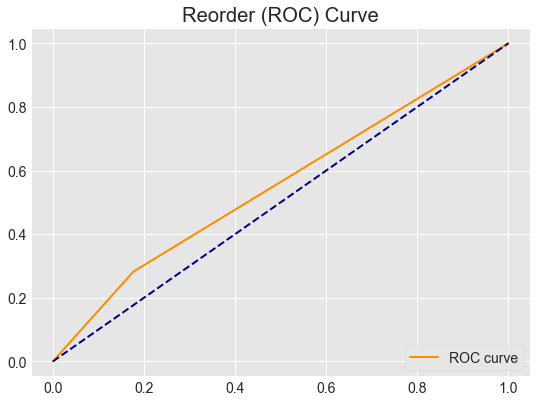

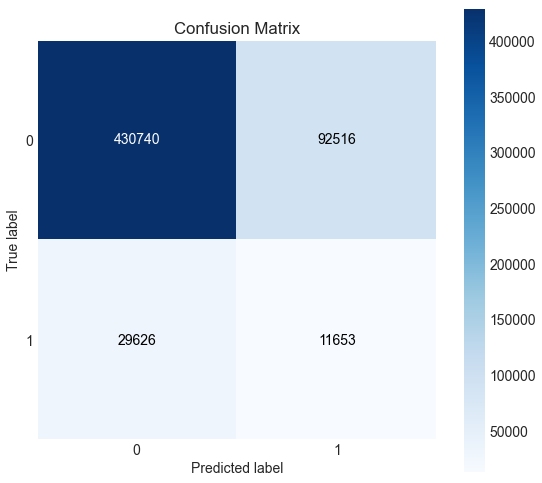

In [78]:
#Final model 
# X_train = X_train[best_features] 
# X_test = X_test[best_features]

logreg = LogisticRegression(C=0.1, class_weight={0: 0.17857142857142855, 1: 0.8214285714285714}, max_iter=500)
logreg.fit(X_train, y_train)

reorder_logit_prob = logreg.predict_proba(X_test)[:,1]

f1=f1_score(y_test,reorder_logit_prob > .35)
brier=brier_score_loss(y_test, reorder_logit_prob > .35)
auc=roc_auc_score(y_test, reorder_logit_prob > .35)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_test, reorder_logit_prob > .35)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

plot_cm(y_test, reorder_logit_prob > .35)



In [111]:
print(X_train.columns)
print(logreg.coef_)

Index(['user_id', 'product_id', 'order_id', 'user_product_count',
       'user_product_first_order', 'user_product_last_order',
       'user_product_avg_basket_placement', 'product_ordered_vol',
       'product_order_twice_ratio', 'user_total_products',
       'user_unique_product_perc', 'user_total_orders', 'user_lifetime_days',
       'user_avg_days_between_orders', 'user_max_time_between_orders',
       'user_min_time_between_orders', 'user_avg_cart_size',
       'user_product_order_rate', 'user_product_reorder_rate',
       'user_product_last_time_product_ordered'],
      dtype='object')
[[-3.02320167e-06 -1.27269034e-05 -1.74853636e-07  1.51325103e-04
  -1.15351287e-04  2.35073808e-04 -3.97323365e-05  5.04171264e-06
   7.43014147e-07 -1.17030214e-03 -2.21989573e-06 -2.21044362e-04
   1.07391869e-04 -8.50216923e-06 -6.87211967e-05  6.37097882e-06
   3.60130750e-06  4.57665367e-06  7.29775743e-06 -4.56118170e-04]]


### validate

f1:0.16023249831173425,auc:0.5520019687566647


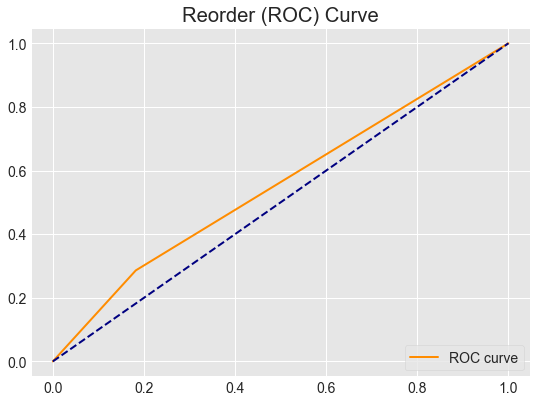

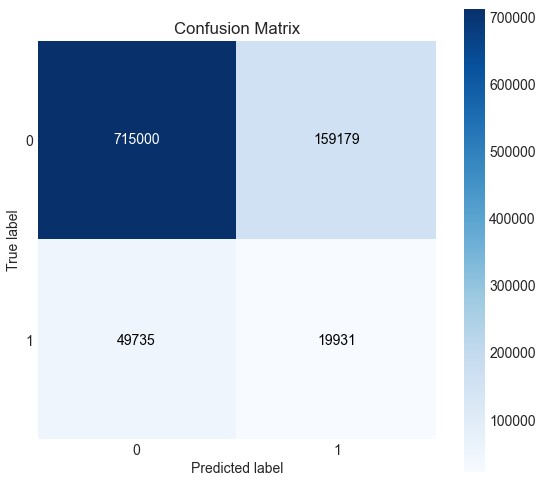

In [73]:
X_val = validate.drop(["target",'eval_set'],axis=1)
y_val = validate['target']

#New X and y for validation data
# X_val= validate[best_features]

#Standardize using training mean/std 
# X_val = (X_val-train_mean)/train_std
# X_val.dropna(axis=1,inplace=True)

# X_val = ct.transform(X_val)

# X_val

# logreg = LogisticRegression(penalty = 'l2', C= .1, max_iter=500)
# logreg.fit(X_val, y_val)

reorder_logit_prob = logreg.predict_proba(X_val)[:,1]

f1=f1_score(y_val,reorder_logit_prob > .35)
brier=brier_score_loss(y_val, reorder_logit_prob > .35)
auc=roc_auc_score(y_val, reorder_logit_prob > .35)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_val, reorder_logit_prob > .35)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

plot_cm(y_val, reorder_logit_prob > .35)

### test

f1:0.162986010671269,auc:0.5527976578566288


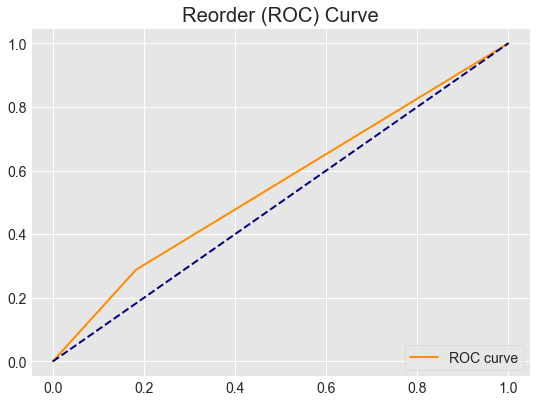

In [74]:
#New X and y for test data

X_final = test.drop(["target",'eval_set'],axis=1)
y_final = test['target']
# X_final = test[best_features]

reorder_logit_prob = logreg.predict_proba(X_final)[:,1]

f1=f1_score(y_final,reorder_logit_prob > .35)
brier=brier_score_loss(y_final, reorder_logit_prob > .35)
auc=roc_auc_score(y_final, reorder_logit_prob > .35)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_final, reorder_logit_prob > .35)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

In [75]:
len(pd.Series(reorder_logit_prob).unique())

929736

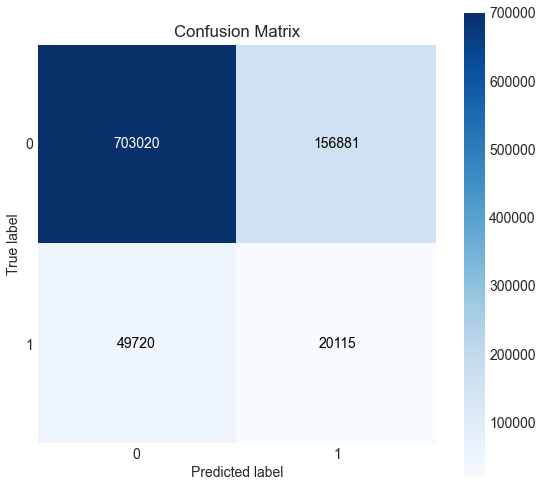

In [76]:
plot_cm(y_final, reorder_logit_prob > .35)

f1:0.15989838305468776,auc:0.5518064059067511


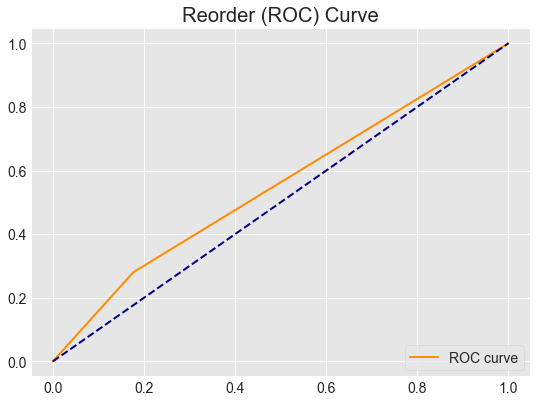

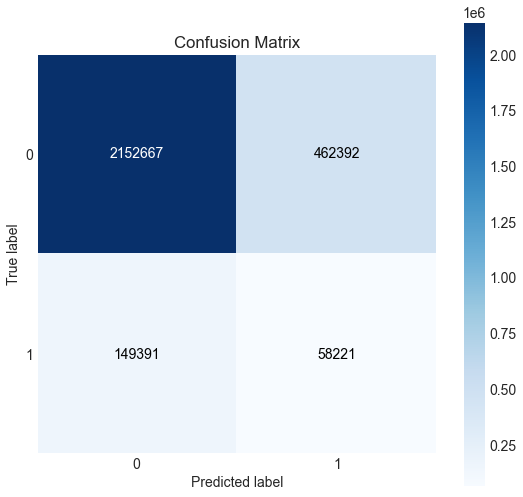

In [77]:
X_whole = X
y_whole = y

reorder_logit_prob = logreg.predict_proba(X_whole)[:,1]

f1=f1_score(y_whole,reorder_logit_prob > .35)
brier=brier_score_loss(y_whole, reorder_logit_prob > .35)
auc=roc_auc_score(y_whole, reorder_logit_prob > .35)

print(f"f1:{f1},auc:{auc}")

#plot ROC 
fpr, tpr, thresholds = roc_curve(y_whole, reorder_logit_prob > .35)

#Visualization for ROC curve
gen_auc_viz(fpr, tpr, thresholds)

plot_cm(y_whole, reorder_logit_prob > .35)